## Limit Cycle Example

This notebook plots temperature and pO2 evolution for a limit cycle regime that reproduces the geologic constraints on the Sturtian.

In [1]:
from model import *
from helpers import *

In [2]:
# run the model

t_max=100
params = {'W_LIP':9,'tau':18,'V_C':8.5,'V_red':1.7,'PC_LIP':0.009}
results = run_model(t_max=t_max,**params,verbose=False)

In [3]:
# analyze timing

t = results["t"]
snowball = results["snowball"]
sb_starts, sb_ends, sb_durs, ig_durs = get_times(t, snowball)
print(f"First Snowball begins at {sb_starts[0]:0.2f} Myr")
print(f"Last Snowball ends after {(sb_ends[-1]-sb_starts[0]):0.2f} Myr")

First Snowball begins at 0.09 Myr
Last Snowball ends after 55.15 Myr


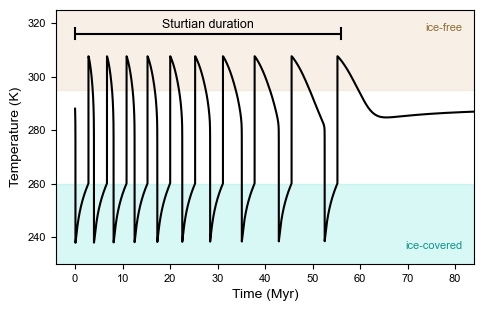

In [4]:
# temperature plot

fig = plt.figure(figsize=(4.18, 2.54))
ax = fig.add_axes([0, 0, 1, 1])

t = results['t']
T = results['T']
ax.plot(t, T, c='k', alpha=1)

# teal and tan
Ti, To = results['Ti'][0], results['To'][0]
ax.axhspan(To, 340, alpha=0.2, color='burlywood')
ax.axhspan(220, Ti, alpha=0.2, color='turquoise')
ax.set_ylim(230, 325)

# axis labels
ax.set_xlabel('Time (Myr)', fontsize=10)
ax.set_ylabel('Temperature (K)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)

# set x limits
t_max = 80
xmin, xmax = 0, t_max
margin = 0.05 * (xmax - xmin)
ax.set_xlim(xmin - margin, xmax + margin)

# "ice-free" and "ice-covered" labels
xlim = ax.get_xlim()
ylim = ax.get_ylim()
padding = xlim[1] * 0.03
text_x = xlim[1] - padding
ax.text(text_x, ylim[0] + 5, "ice-covered", c='#10948a', ha='right', va='bottom', fontsize=8)
ax.text(text_x, ylim[1] - 5, "ice-free", c='#8b6d32', ha='right', va='top', fontsize=8)

# Sturtian duration annotation
y = 316
tick_height = 2
ax.hlines(y, 0, 56, color='k')
ax.plot([0, 0], [y - tick_height, y + tick_height], c='k')
ax.plot([56, 56], [y - tick_height, y + tick_height], c='k')
ax.text(28, y + 1, "Sturtian duration", ha='center', va='bottom', fontsize=9)

plt.savefig('figs/limit_cycle_example.pdf', format='pdf', bbox_inches='tight')
plt.show()

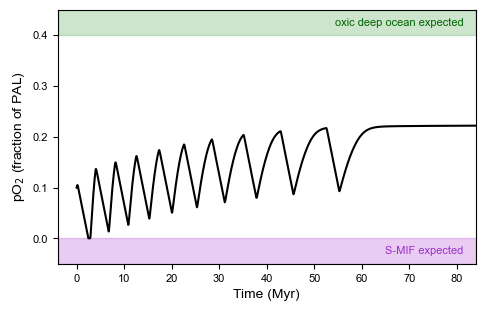

In [5]:
# O2 plot

fig = plt.figure(figsize=(4.18, 2.54))
ax = fig.add_axes([0, 0, 1, 1])

t = results['t']
pO2 = results['pO2']
ax.plot(t, pO2, c='k', alpha=1)

# axis labels and ticks
ax.set_xlabel('Time (Myr)', fontsize=10)
ax.set_ylabel('pO$_2$ (fraction of PAL)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)

# axes limits
t_max = 80
xmin, xmax = 0, t_max
margin = 0.05 * (xmax - xmin)
ax.set_xlim(xmin - margin, xmax + margin)
ax.set_ylim(-0.05, 0.45)

# horizontal bands and labels
xlim = ax.get_xlim()
ylim = ax.get_ylim()
padding = xlim[1] * 0.03
text_x = xlim[1] - padding

# S-MIF threshold
SMIF_threshold = (2.1 / 1e6) / 0.2  # ppm to fraction of PAL
ax.axhspan(ylim[0], SMIF_threshold, color='mediumorchid', alpha=0.3)
ax.text(text_x, -0.025, 'S-MIF expected', color='darkorchid', ha='right', va='center', fontsize=8)

# oxic deep ocean threshold
ax.axhspan(0.4, ylim[1], color='green', alpha=0.2)
ax.text(text_x, 0.425, 'oxic deep ocean expected', color='darkgreen', ha='right', va='center', fontsize=8)

plt.savefig('figs/limit_cycle_O2.pdf', format='pdf', bbox_inches='tight')
plt.savefig('figs_poster/limit_cycle_O2.png', format='png', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

Total LIP volume used: 8.8 Mkm3
Total LIP height used: 2.0 km
Initial P_eff required: 200 m/Myr


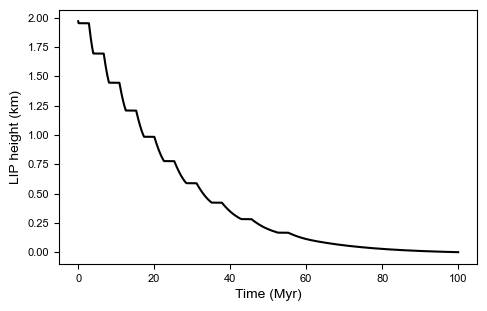

In [6]:
# LIP volume/height analysis and plot

t, vol, height = LIP_volume(results,A0=4.45)

fig = plt.figure(figsize=(4.18, 2.54))
ax = fig.add_axes([0, 0, 1, 1])

max_height = np.max(height)/1e3
ax.plot(t, max_height-height/1e3, c='k', alpha=1)

# axis labels and ticks
ax.set_xlabel('Time (Myr)', fontsize=10)
ax.set_ylabel('LIP height (km)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)

figname="example_LIP_height.pdf"
savefig(fig,figname,savefmt='pdf',supp_folder="supp")

plt.show()

In [7]:
def mask_snowball_times(var, snowball):
    sb_arr = np.ma.masked_array(var, mask=~snowball)
    ig_arr = np.ma.masked_array(var, mask=snowball)
    return sb_arr, ig_arr

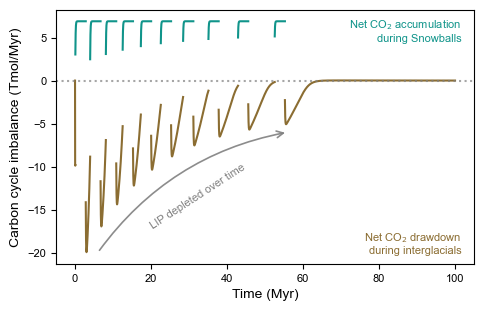

In [42]:
fig = plt.figure(figsize=(4.18, 2.54))
ax = fig.add_axes([0, 0, 1, 1])

sb_arr, ig_arr = mask_snowball_times(results['dNdt'], results['snowball'])

ax.plot(t,ig_arr, c='#8b6d32', alpha=1, label='During interglacials')
ax.plot(t,sb_arr, c='#10948a', alpha=1, label='During Snowballs')

ax.axhline(0, color='grey', linestyle=':', alpha=0.7)

# axis labels and ticks
ax.set_xlabel('Time (Myr)', fontsize=10)
ax.set_ylabel('Carbon cycle imbalance (Tmol/Myr)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)
#ax.legend(fontsize=8, loc='lower right')

# Corner annotations
xlim = ax.get_xlim()
ylim = ax.get_ylim()
pad_x = 0.03 * (xlim[1] - xlim[0])
pad_y = 0.03 * (ylim[1] - ylim[0])
ax.text(xlim[1] - pad_x, ylim[1] - pad_y, 'Net CO$_2$ accumulation\nduring Snowballs',
        ha='right', va='top', fontsize=8, color='#10948a')
ax.text(xlim[1] - pad_x, ylim[0] + pad_y, 'Net CO$_2$ drawdown\nduring interglacials',
        ha='right', va='bottom', fontsize=8, color='#8b6d32')

# Curved arrow annotation
from matplotlib.patches import FancyArrowPatch
x0, y0 = 6, -20   # arrow tail
x1, y1 = 56, -6   # arrow head
arrow = FancyArrowPatch((x0, y0), (x1, y1),
                         connectionstyle='arc3,rad=-0.2',
                         arrowstyle='->', mutation_scale=12,
                         linewidth=1.2, color='grey', alpha=0.9)
ax.add_patch(arrow)
label_x, label_y = 20, -17   # text start position
angle = 33
ax.text(label_x, label_y, 'LIP depleted over time', ha='left', va='center',
        fontsize=8, color='grey', rotation=angle, rotation_mode='anchor')

plt.show()

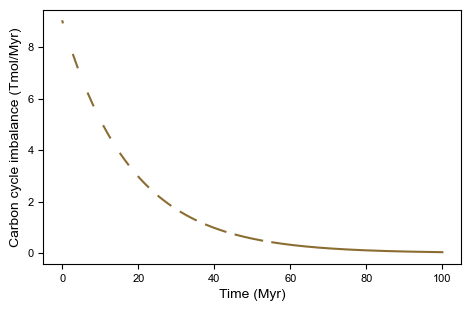

In [14]:
fig = plt.figure(figsize=(4.18, 2.54))
ax = fig.add_axes([0, 0, 1, 1])

Cimb_arr = results['W_LIP0']*np.exp(-t/results['tau'][0])

sb_arr, ig_arr = mask_snowball_times(Cimb_arr, results['snowball'])

ax.plot(t,ig_arr, c='#8b6d32', alpha=1, label='During interglacials')
#ax.plot(t,sb_arr, c='#10948a', alpha=1, label='During Snowballs')

# axis labels and ticks
ax.set_xlabel('Time (Myr)', fontsize=10)
ax.set_ylabel('Carbon cycle imbalance (Tmol/Myr)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)

plt.show()